In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, roc_auc_score 

In [5]:
# Step 1: Load dataset
# Load the breast cancer dataset from sklearn
X, y = load_breast_cancer(return_X_y=True)


In [6]:
# Step 2: Split the data
# Split the dataset into 80% training and 20% testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
#Logistic Regression without Regularization

lr_no_reg = LogisticRegression(penalty='none', random_state=42)
lr_no_reg.fit(X_train_scaled, y_train)
y_pred_no_reg = lr_no_reg.predict(X_test_scaled)
y_prob_no_reg = lr_no_reg.predict_proba(X_test_scaled)


print(classification_report(y_test, y_pred_no_reg))



              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.92      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [17]:
# Logistic Regression with L1 Regularization(Lasso)

lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lr_l1.fit(X_train_scaled, y_train)
y_pred_l1 = lr_l1.predict(X_test_scaled)
y_prob_l1 = lr_l1.predict_proba(X_test_scaled)


print(classification_report(y_test, y_pred_l1))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [18]:
# Logistic Regression with L2 Regularization(Ridge)

lr_l2 = LogisticRegression(penalty='l2', random_state=42)
lr_l2.fit(X_train_scaled, y_train)
y_pred_l2 = lr_l2.predict(X_test_scaled)
y_prob_l2 = lr_l2.predict_proba(X_test_scaled)


print(classification_report(y_test, y_pred_l2))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



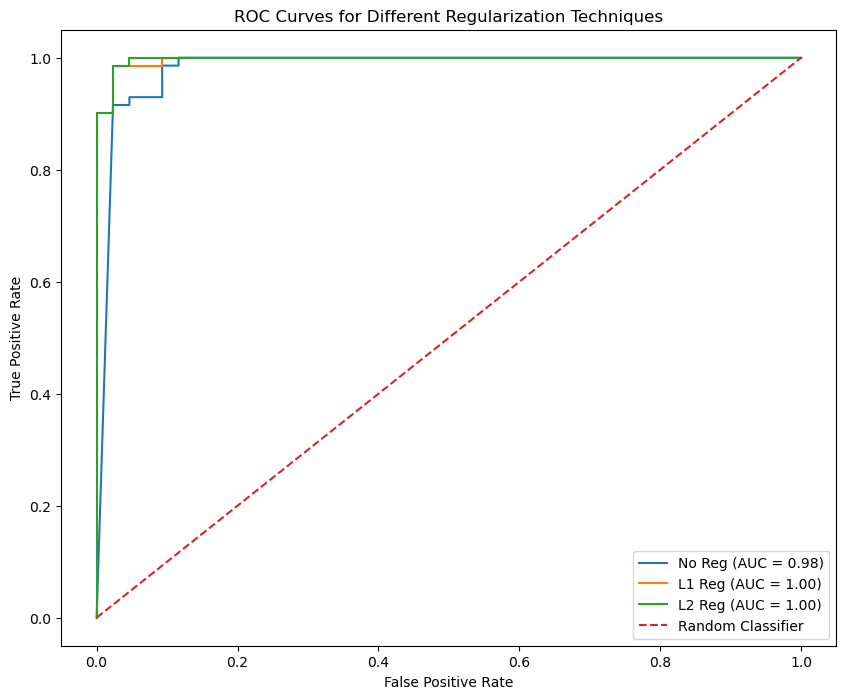

In [15]:
# ROC Curves
plt.figure(figsize=(10, 8))

# No Regularization
fpr_no_reg, tpr_no_reg, _ = roc_curve(y_test, y_prob_no_reg[:, 1])
roc_auc_no_reg = roc_auc_score(y_test, y_prob_no_reg[:, 1])
plt.plot(fpr_no_reg, tpr_no_reg, label=f'No Reg (AUC = {roc_auc_no_reg:.2f})')

# L1 Regularization
fpr_l1, tpr_l1, _ = roc_curve(y_test, y_prob_l1[:, 1])
roc_auc_l1 = roc_auc_score(y_test, y_prob_l1[:, 1])
plt.plot(fpr_l1, tpr_l1, label=f'L1 Reg (AUC = {roc_auc_l1:.2f})')

# L2 Regularization
fpr_l2, tpr_l2, _ = roc_curve(y_test, y_prob_l2[:, 1])
roc_auc_l2 = roc_auc_score(y_test, y_prob_l2[:, 1])
plt.plot(fpr_l2, tpr_l2, label=f'L2 Reg (AUC = {roc_auc_l2:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.title('ROC Curves for Different Regularization Techniques')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


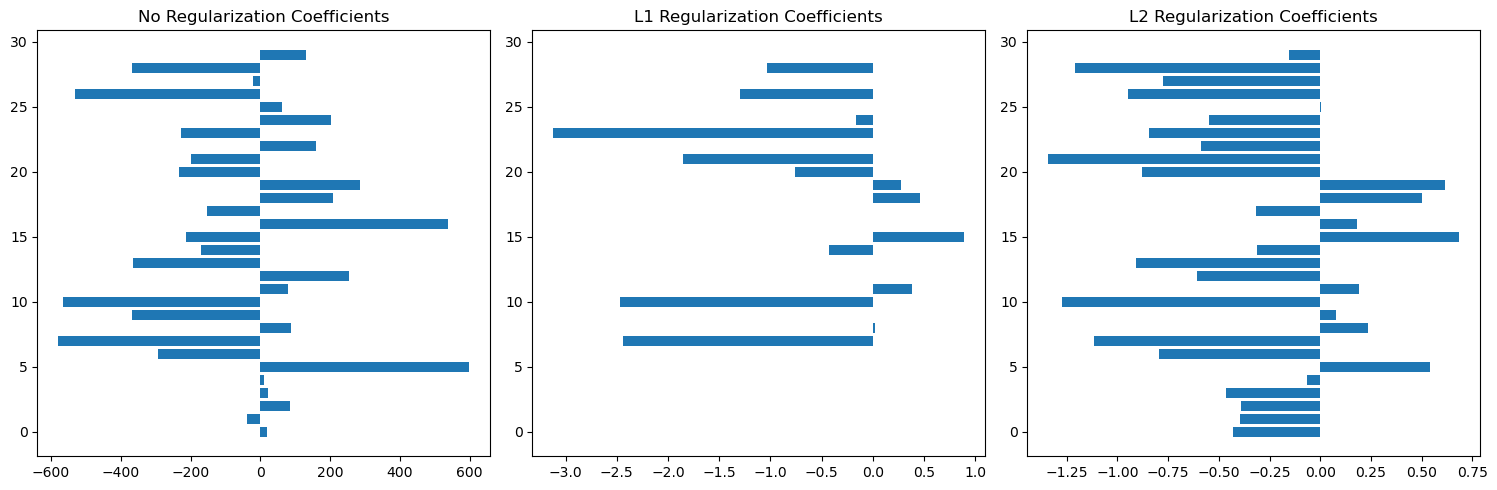

In [19]:
# Feature Importance Comparison
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.barh(range(len(lr_no_reg.coef_[0])), lr_no_reg.coef_[0])
plt.title('No Regularization Coefficients')

plt.subplot(132)
plt.barh(range(len(lr_l1.coef_[0])), lr_l1.coef_[0])
plt.title('L1 Regularization Coefficients')

plt.subplot(133)
plt.barh(range(len(lr_l2.coef_[0])), lr_l2.coef_[0])
plt.title('L2 Regularization Coefficients')

plt.tight_layout()
plt.show()